# Proyek Analisis Data: Air Quality Dataset Aotizhongxin
- **Nama:** Ronald Silvester Sanger
- **Email:** m180b4ky3964@bangkit.academy
- **ID Dicoding:** ronald_silvester

## Menentukan Pertanyaan Bisnis

- Question 1: What is the correlation between wind speed (WSPM) and PM2.5 concentration levels?
- Question 2: Are there identifiable seasonal patterns in PM10 concentration levels across different months or seasons?

## Import Semua Packages/Library yang Digunakan

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [86]:
file_path = './dashboard/PRSA_Data_Aotizhongxin_20130301-20170228.csv'

data = pd.read_csv(file_path)
data.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- The dataset shows data of air quality metrics such as PM2.5, PM10, SO2, NO2, CO, and O3. Additionally, meteorological data like temperature (TEMP), wind speed (WSPM), and pressure (PRES) are also included, allowing for the analysis of environmental factors that influence air quality.

### Assessing Data

In [8]:
info = data.info()

missing_values = data.isnull().sum()

descriptive_stats = data.describe()

info, missing_values, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(None,
 No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       925
 PM10        718
 SO2         935
 NO2        1023
 CO         1776
 O3         1719
 TEMP         20
 PRES         20
 DEWP         20
 RAIN         20
 wd           81
 WSPM         14
 station       0
 dtype: int64,
                  No          year         month           day          hour  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std    10122.249256      1.177213      3.448752      8.800218      6.922285   
 min        1.000000   2013.000000      1.000000      1.000000      0.000000   
 25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
 50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
 75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
 max    35064.000000   2017.0000

**Insight:**
- There are several air quality metrics that have missing values, with CO having the most missing data (5%). HMissing values needs to be handled before analysis.

### Cleaning Data

In [88]:
file_path = './dashboard/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)


data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data_cleaned = data.drop(columns=['No', 'station', 'wd'])
data_cleaned = data_cleaned.dropna(subset=['PM2.5', 'PM10', 'WSPM'])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_cleaned['season'] = data_cleaned['month'].apply(get_season)

cleaned_file_path = './data/PRSA_Data_Aotizhongxin_20130301-20170228(3).csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data cleaned and saved to {cleaned_file_path}")


Data cleaned and saved to ./data/PRSA_Data_Aotizhongxin_20130301-20170228(3).csv


**Insight:**
- The cleaned dataset has fewer missing values, especially in critical columns like PM2.5, PM10, and O3, allowing for more accurate analysis.
- New columns, such as date and season, have been added to facilitate more structured temporal and seasonal analysis.
  

### Clustering

In [91]:
file_path = './dashboard/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
data = pd.read_csv(file_path)

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

data_cleaned = data.drop(columns=['No', 'station', 'wd'])
data_cleaned = data_cleaned.dropna(subset=['PM2.5', 'PM10', 'WSPM'])

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_cleaned['season'] = data_cleaned['month'].apply(get_season)

seasonal_clusters = data_cleaned.groupby('season').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

print(seasonal_clusters)


   season      PM2.5        PM10        SO2        NO2           CO         O3
0    Fall  86.569860  110.090641  11.232886  69.088737  1314.525592  32.554219
1  Spring  81.207580  132.035218  21.573476  55.294110  1009.564870  67.362031
2  Summer  67.551605   81.507977   6.176350  48.685590   843.698203  92.618771
3  Winter  96.346166  116.981086  31.434068  64.959324  1920.473432  30.104608


**Insight:**

- **Winter:**
  - **High pollutant levels:** This season has the highest levels of fine particulate matter (PM2.5) and carbon monoxide (CO), which could be due to increased heating, reduced dispersion in cold air, or more industrial activities.
  - **Ozone (O3) is low:** Ozone levels are relatively low, which is common in colder temperatures as there is less sunlight to cause photochemical reactions that produce ozone.

- **Spring:**
  - **Moderate pollution:** PM2.5 and CO levels are lower than in Winter, but still significant.
  - **High O3 levels:** Ozone levels increase compared to Winter, likely due to increased sunlight and photochemical reactions.
  - **PM10 is higher than in Winter:** This could be due to more dust or pollen in the air during the spring season.

- **Summer:**
  - **Lowest particulate matter (PM2.5 and PM10):** Air quality in terms of particulate matter improves during Summer, possibly due to more wind or rain dispersing pollutants.
  - **High Ozone levels (O3):** Ozone levels are highest in Summer, likely due to sunlight driving photochemical reactions that produce ozone.

- **Fall:**
  - **Moderate pollution levels:** Pollution levels start to increase again as temperatures cool. PM2.5, PM10, and CO are higher than in Summer but lower than in Winter.
  - **NO2 and CO levels remain high:** Fall seems to have relatively high nitrogen dioxide and carbon monoxide levels, perhaps due to increased vehicle emissions or industrial activities.


## Exploratory Data Analysis & Visualization

**Scatter Plot & Bar Plot**

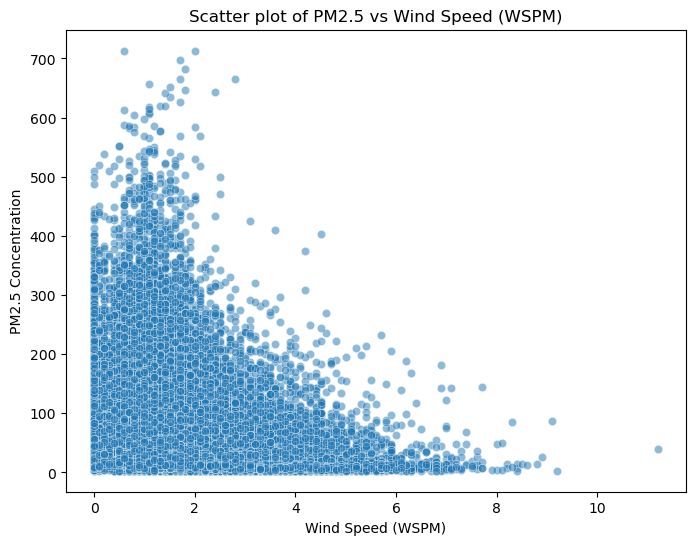

Correlation between PM2.5 and WSPM:
          PM2.5      WSPM
PM2.5  1.000000 -0.279599
WSPM  -0.279599  1.000000


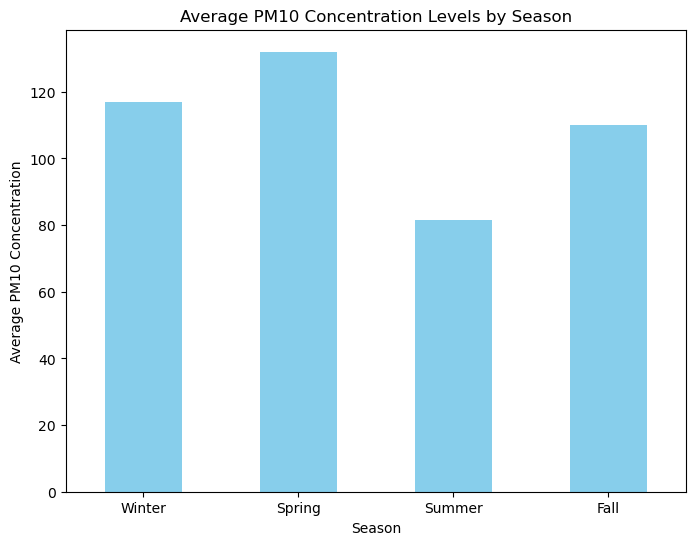

Seasonal PM10 averages:
season
Winter    116.981086
Spring    132.035218
Summer     81.507977
Fall      110.090641
Name: PM10, dtype: float64


In [64]:
file_path = './data/Cleaned_PRSA_Data_20130301-20170228(2).csv'

cleaned_data = pd.read_csv(file_path)
correlation = cleaned_data[['PM2.5', 'WSPM']].corr()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=cleaned_data, alpha=0.5)
plt.title('Scatter plot of PM2.5 vs Wind Speed (WSPM)')
plt.xlabel('Wind Speed (WSPM)')
plt.ylabel('PM2.5 Concentration')
plt.show()

print("Correlation between PM2.5 and WSPM:")
print(correlation)

seasonal_pm10 = cleaned_data.groupby('season')['PM10'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

plt.figure(figsize=(8, 6))
seasonal_pm10.plot(kind='bar', color='skyblue')
plt.title('Average PM10 Concentration Levels by Season')
plt.xlabel('Season')
plt.ylabel('Average PM10 Concentration')
plt.xticks(rotation=0)
plt.show()

print("Seasonal PM10 averages:")
print(seasonal_pm10)


**Insight:**

**Scatter Plot:**

<ul>
  <li>The correlation coefficient between wind speed (WSPM) and PM2.5 concentration is approximately -0.28, indicating a weak negative correlation. This means that, as wind speed increases, PM2.5 concentration tends to slightly decrease.</li>
  <li>The scatter plot visualizes this relationship, showing that there is some tendency for higher wind speeds to be associated with lower PM2.5 levels, though the trend is not very strong.</li>
</ul>

**Bar Plot:**

<ul>
    <li>The average PM10 concentration levels by season are:
        <ul>
            <li><strong>Winter:</strong> 116.98</li>
            <li><strong>Spring:</strong> 132.04</li>
            <li><strong>Summer:</strong> 81.51</li>
            <li><strong>Fall:</strong> 110.09</li>
        </ul>
    </li>
    <li>The bar plot sh <stro</strong> has the highest average PM10 concentratio <stro</strong> has the lowest. This indicates a potential seasonal pattern where air quality improves during the summer and worsens in the spring.</li>
</ul>


## Visualization & Exploratory Analysis

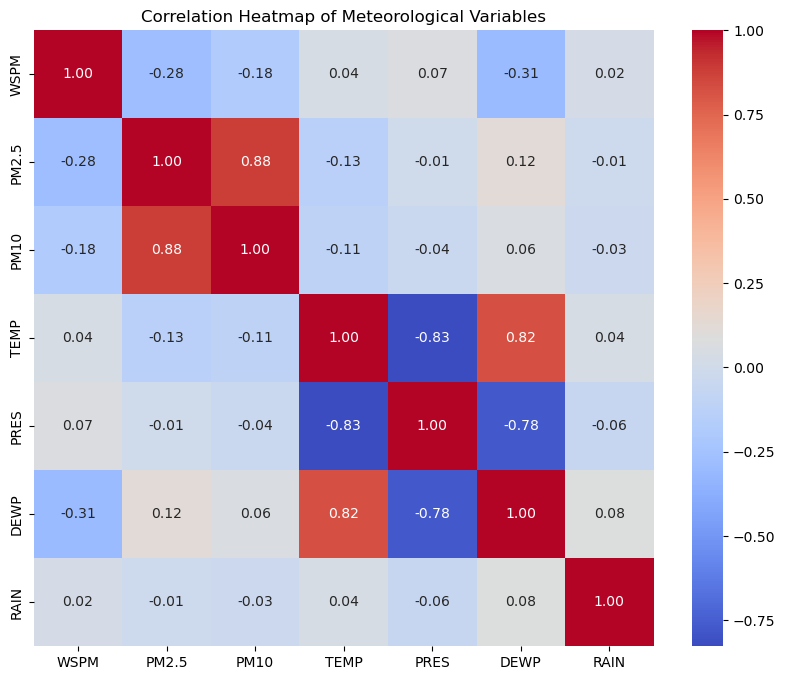

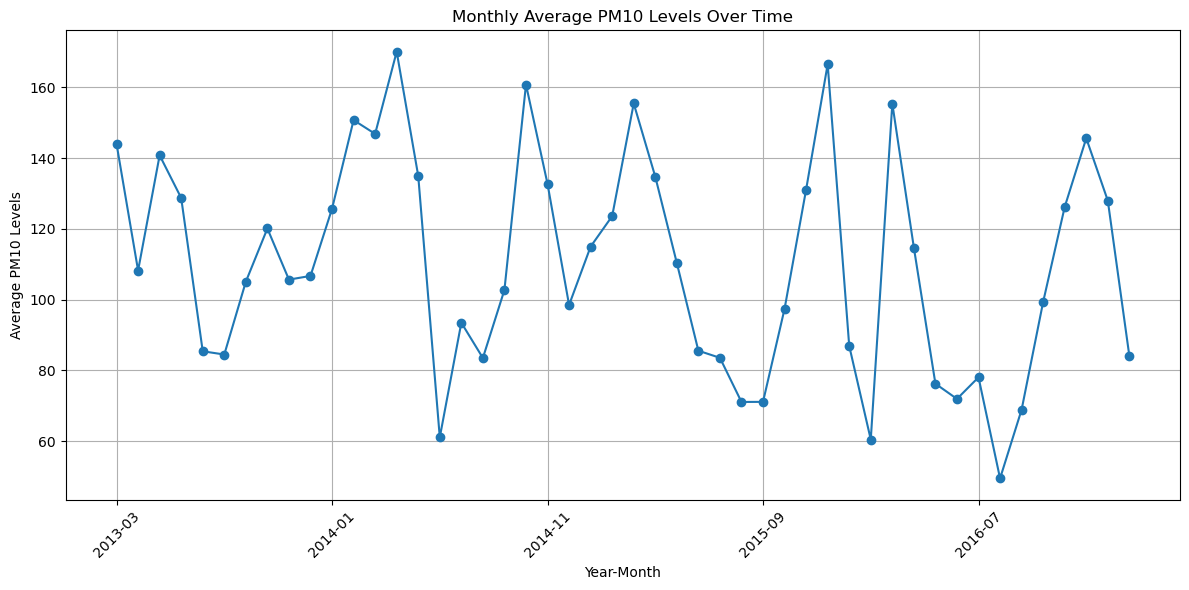

In [78]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[['WSPM', 'PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Meteorological Variables')
plt.show()

data['year_month'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

monthly_pm10 = data.groupby('year_month')['PM10'].mean()

plt.figure(figsize=(12, 6))
monthly_pm10.plot(kind='line', marker='o')
plt.title('Monthly Average PM10 Levels Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average PM10 Levels')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight:**

- **Correlation Heatmap**: The heatmap reveals a weak negative correlation between wind speed (WSPM) and PM2.5 levels, indicating that higher wind speeds tend to slightly reduce the concentration of PM2.5 particles in the air. This supports the idea that wind plays a role in dispersing particulate matter, contributing to better air quality.
- **Monthly Average PM10 Levels Over Time**: The line plot of monthly average PM10 levels shows clear seasonal variations, with higher concentrations observed in spring and lower levels during the summer. This trend suggests that air quality tends to worsen in spring, possibly due to increased industrial activity or natural events, and improves in summer, likely due to favorable weather conditions.


## Conclusion

<ul>
        <li>Correlation between Wind Speed (WSPM) and PM2.5 Levels:
            <ul>
                <li>The correlation coefficient between WSPM and PM2.5 is approximately -0.28, indicating a weak negative correlation. This suggests that higher wind speeds tend to slightly reduce the concentration of PM2.5 particles in the air. Although the correlation is not very strong, it implies that wind can help disperse particulate matter, contributing to better air quality.</li>
            </ul>
        </li>
        <li>Seasonal Patterns in PM10 Concentration Levels:
             <ul>
                <li>The seasonal analysis reveals distinct patterns in PM10 levels. Spring has the highest average concentration of PM10 (132.04), while Summer has the lowest (81.51). This pattern suggests that air quality tends to worsen in spring and improve in summer, likely due to a combination of seasonal factors such as increased industrial activity, weather patterns, and natural events like dust storms.</li>
            </ul>
    </ul>